# Importing The Libraries

In [453]:
# importing all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [454]:
# Loading the dataset
data=pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [455]:
data.shape

(178, 14)

In [456]:
# checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [457]:
# checking the stastical summary of the dataset
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Visualization

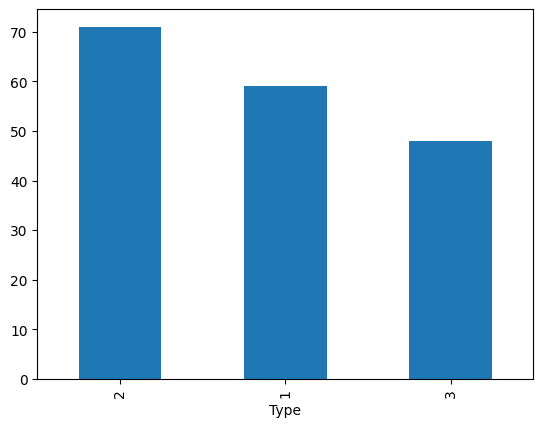

In [458]:
# Barchart for Type feature
data['Type'].value_counts().plot(kind="bar")
plt.show()

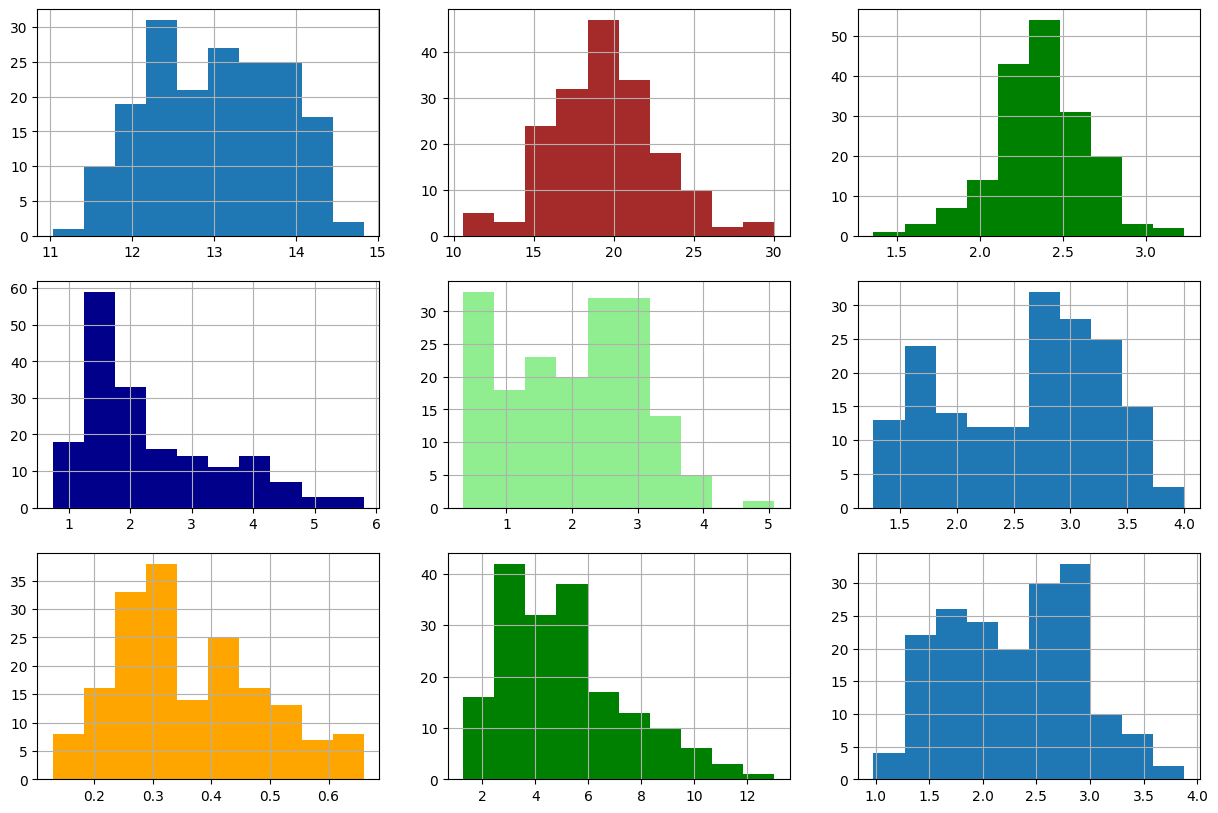

In [459]:
# # Histogram for all numeric columns
fig,ax=plt.subplots(figsize=(15,10),nrows=3,ncols=3)
data.Alcohol.hist(ax=ax[0,0])
data.Alcalinity.hist(ax=ax[0,1],color="Brown")
data.Ash.hist(ax=ax[0,2],color="Green")
data.Malic.hist(ax=ax[1,0],color="DarkBlue")
data.Flavanoids.hist(ax=ax[1,1],color="LightGreen")
data.Dilution.hist(ax=ax[1,2])
data.Nonflavanoids.hist(ax=ax[2,0],color='orange')
data.Color.hist(ax=ax[2,1],color="Green")
data.Phenols.hist(ax=ax[2,2])
plt.show()

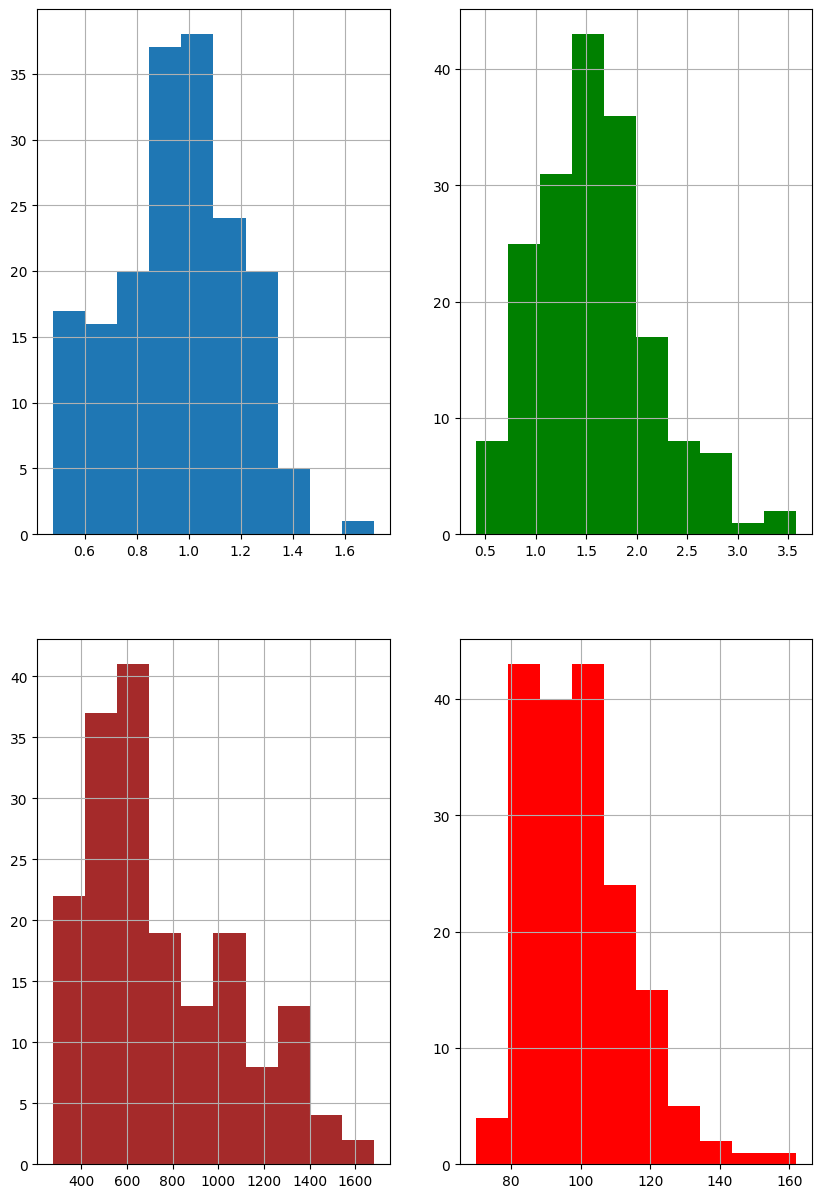

In [460]:
# histogram for remining columns
fig,ax=plt.subplots(figsize=(10,15),ncols=2,nrows=2)
data.Hue.hist(ax=ax[0,0])
data.Proanthocyanins.hist(ax=ax[0,1],color="Green")
data.Proline.hist(ax=ax[1,0],color="Brown")
data.Magnesium.hist(ax=ax[1,1],color="red")
plt.show()

In [461]:
# calculating the skewness
data.skew()

,0
Type,0.107431
Alcohol,-0.051482
Malic,1.039651
Ash,-0.176699
Alcalinity,0.213047
Magnesium,1.098191
Phenols,0.086639
Flavanoids,0.025344
Nonflavanoids,0.450151
Proanthocyanins,0.517137


### Here most of the features are postively skewed and few are negatively skewed.

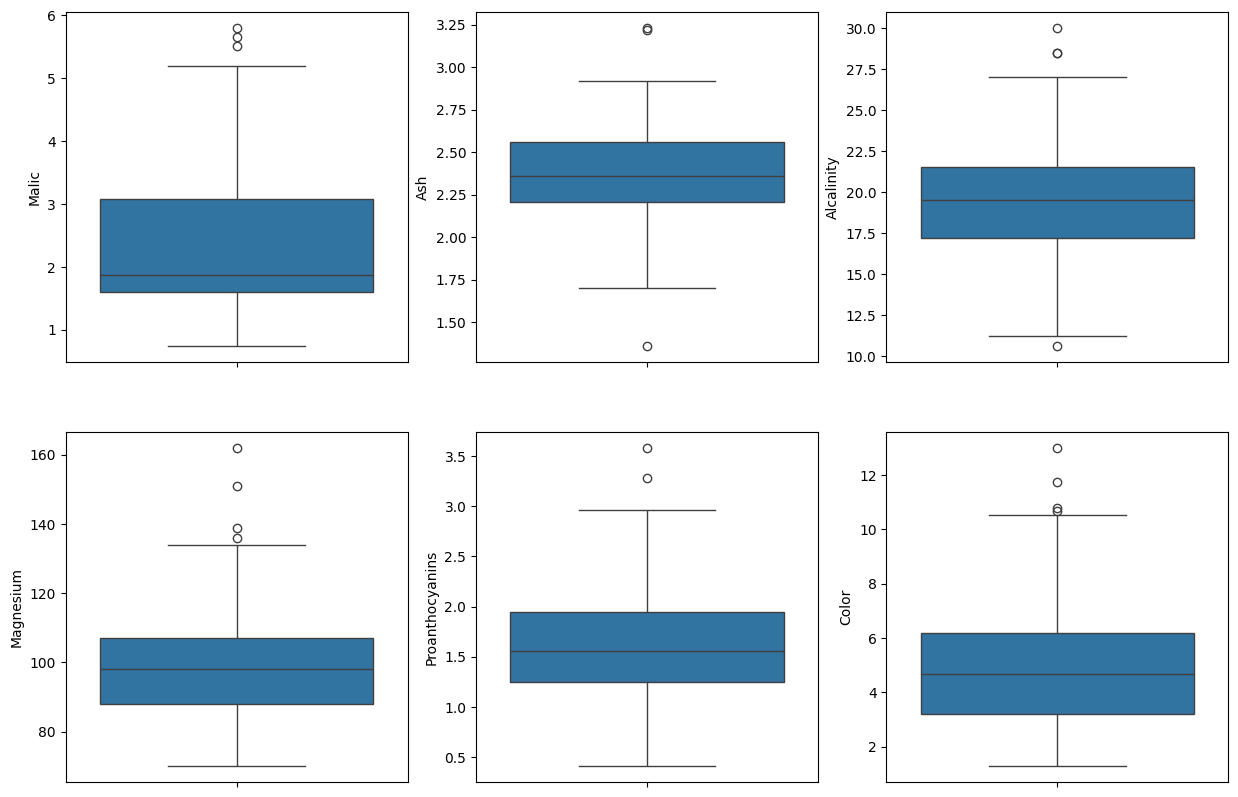

In [462]:
# Boxplot for the Malic Feature
fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=3)
sns.boxplot(data['Malic'],ax=ax[0,0])
sns.boxplot(data['Ash'],ax=ax[0,1])
sns.boxplot(data['Alcalinity'],ax=ax[0,2])
sns.boxplot(data['Magnesium'],ax=ax[1,0])
sns.boxplot(data['Proanthocyanins'],ax=ax[1,1])
sns.boxplot(data['Color'],ax=ax[1,2])
plt.show()

#### These are the genuine outliers,so we can't treat them.

In [463]:
# calculating the correlation
corr=data.corr("pearson")
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


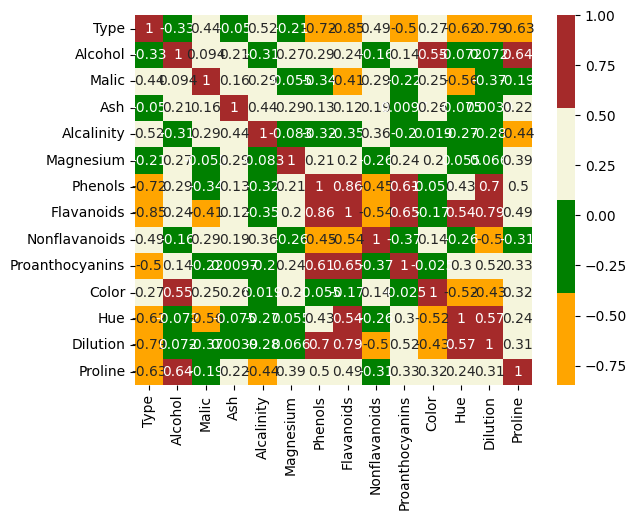

In [464]:
# ploting the heatmap
sns.heatmap(corr,cmap=["orange","green","beige",'brown'],annot=True)
plt.show()

### Here phenols,Flavanoids are high correlated and remaining all are moderately correalted.

In [465]:
# usually we drop Type feature in the dataset
# because it is not important,clustering is done the remaining features
# data.drop(["Type"],axis=1,inplace=True)

In [466]:
# standardizing the dataset
data1=scale(data)
data=pd.DataFrame(data1,columns=data.columns)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Dimensionality Reduction with PCA

In [467]:
# intialization of the pca
pca=PCA()
pca_data=pca.fit_transform(data)

In [468]:
# finding the variance of the each principle component
var=pca.explained_variance_ratio_

In [469]:
# calculating Variance of the pca
np.cumsum(var)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

#### Here we choose the nine(7) principle components to obtain the 90% of the data.

In [488]:
# transformation of the orginal dataset into Principle components
pca1=PCA(n_components=7)
pca_data1=pca1.fit_transform(data)
pca_data1=pd.DataFrame(pca_data1,columns=["PC1","PC2","PC3",'PC4','PC5','PC6','PC7'])

In [489]:
# weights of the all the principle components
pca1.components_

array([[ 0.38838491, -0.10760073,  0.23060981,  0.0116208 ,  0.21721438,
        -0.1081178 , -0.351035  , -0.3861751 ,  0.26259391, -0.27372774,
         0.11592192, -0.28689128, -0.35411209, -0.24474347, -0.16767027],
       [-0.03655147,  0.46975098,  0.17913205,  0.27362541, -0.05514153,
         0.28470482,  0.09662105,  0.03440124, -0.01421351,  0.0621856 ,
         0.48118572, -0.22533257, -0.1148958 ,  0.37559513, -0.36846449],
       [ 0.00604656, -0.17836638,  0.10524178,  0.64217316,  0.61133119,
         0.14868987,  0.14591513,  0.14644312,  0.17592761,  0.14963056,
        -0.1011216 ,  0.06242706,  0.1500664 , -0.10818639,  0.06654776],
       [ 0.12316714, -0.07872666,  0.47098638, -0.24967948,  0.07062393,
        -0.16093986,  0.19041785,  0.1437237 , -0.32724841,  0.46259663,
         0.07655913, -0.4374667 ,  0.15412178, -0.25389911,  0.01073607],
       [ 0.15768101, -0.2498193 , -0.18860446, -0.09325108,  0.04610826,
         0.77898407, -0.14493358, -0.11234694, 

# Clustering with Orginal dataset

In [472]:
# intializing the KMeans algorithm
kmeans=KMeans(n_clusters=4).fit(data)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [473]:
kmeans.inertia_

1256.468329805241

In [474]:
# calculating the interia of the different clusters
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i).fit(data)
  wcss.append(km.inertia_)
wcss

[2491.9999999999995,
 1727.2286609320033,
 1285.5622587402038,
 1217.8576706216372,
 1193.6119460833631,
 1062.7864329514232,
 1037.8074150363502,
 973.9872529928278,
 953.4298813074788,
 893.754052241807]

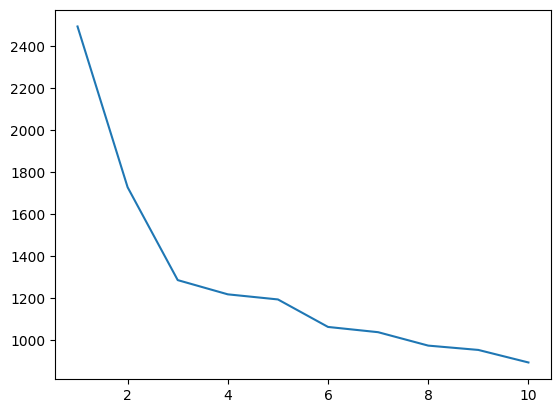

In [475]:
# plotting k value and wcss to find best k value using elbow method
plt.plot(range(1,11),wcss)
plt.show()

#### Here i choose k=3 has the best K value

In [476]:
# intializing the KMeans with k=3
km=KMeans(n_clusters=3).fit(data)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [477]:
data['clust']=km.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


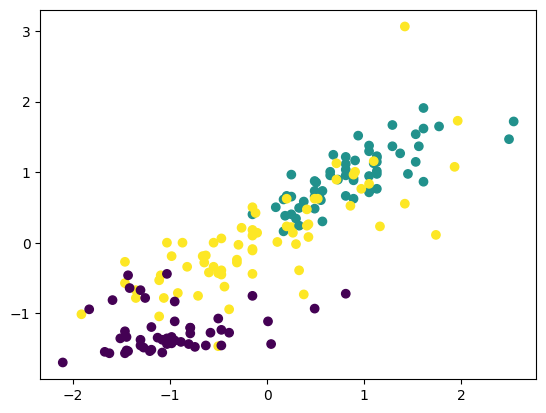

In [478]:
# plotting the clusters
# Here i choose the phenols,Flavanoids to display the clusters
plt.scatter(data["Phenols"],data["Flavanoids"],c=km.labels_)
plt.show()

#### Here the clusters are overlapped, but when we visualize it in the multidimension space then it's good.

In [479]:
# calculating the silhouette score
silhouette_score(data,km.labels_)

np.float64(0.33433891415512323)

# Clustering with PCA

In [480]:
# clustering with PCA
km_pca=KMeans(n_clusters=4).fit(pca_data1)
km_pca.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [481]:
km_pca.inertia_

934.599821065802

In [482]:
# calculating the interia for the 1 to 10 k values
wcss_pca=[]
for k in range(1,11):
  km=KMeans(n_clusters=k).fit(pca_data1)
  wcss_pca.append(km.inertia_)
wcss_pca

[2226.975115339717,
 1462.7887719246655,
 1022.6504302552421,
 933.5318723014379,
 903.6103840309602,
 814.346673277632,
 746.437660853418,
 725.989984141155,
 705.1510061385417,
 633.9029596340301]

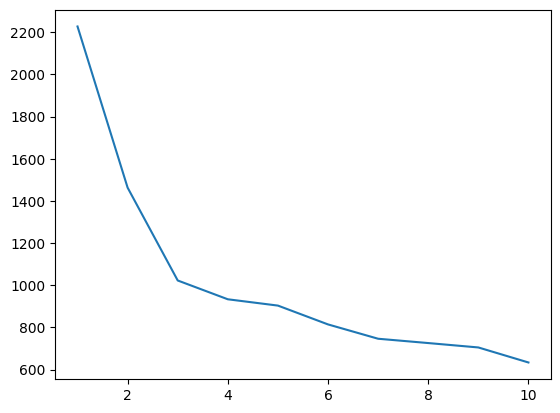

In [483]:
# choosing the best k value using the elbow method
plt.plot(range(1,11),wcss_pca)

#### Here i choose the k=3 as best k value

In [484]:
# intializing the kmeans with k=3
km=KMeans(n_clusters=3).fit(pca_data1)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [485]:
pca_data1['clust']=km.labels_
pca_data1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clust
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,1
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,1
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,1
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,1
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,1
...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,2
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,2
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,2
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,2


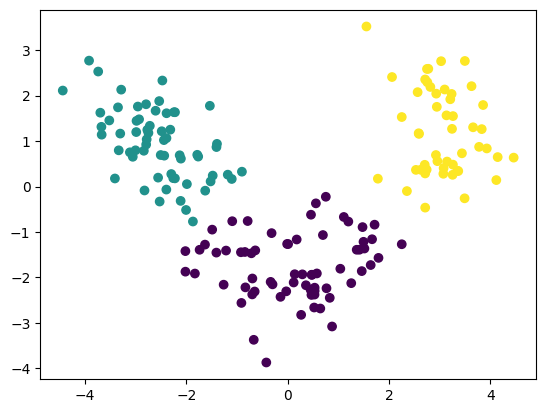

In [486]:
# plotting the scatter plot between PC1,PC2
plt.scatter(pca_data1['PC1'],pca_data1['PC2'],c=km.labels_)
plt.show()

# Here there is no overlapping between the clusters

In [487]:
# calculating the silhouette score
silhouette_score(pca_data1,km.labels_)

np.float64(0.38220585398077267)

#### Here silhoeutte score is a little high when we compared with clustering with original dataset.

# Comparison and Analysis

#### When we compared clustering with orginal dataset and clustering with pca the silhoeutte score is little high and Interia is little less in clustering with pca.
#### similarities are both performs good when n_clusters is 3, when compared other k values.
#### Implent of pca reduce the interia and provides a bit high silhoeutte score.
#### Gaining a little high silhoeutte score or less interia vs lossing some amount(10%) of information.

# Conclusion and Insights

#### In the sense of pratical, both performs underwell because the silhoeutte score is less than 0.5. But when we compare between them clustering with pca is good.
#### Implent of pca reduce the interia and provides a bit high silhoeutte score.
#### This dataset is well suited for the classification algorithms.